In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-world-university-rankings-2011-2023/2017_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2020_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2023_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2015_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2018_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2022_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2012_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2013_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2014_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2016_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2021_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2011_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2019_rankings.csv


In [2]:
# load the datasets of top university
df23 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2023_rankings.csv")
df22 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2022_rankings.csv")
df21 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2021_rankings.csv")
df20 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2020_rankings.csv")
df19 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2019_rankings.csv")

1. Top Uni rankings over a period of past 5 years
2. Top Uni with rankings change in over past 5 years in all measures
3. radar chart of of scores by individual uni.
4. University students count over a period a last 5 years
5. scatter plot of T&R rankings with number of students 

### 1. Top university ranking over past 5 years

In [3]:
def ranking_by_year(df, year):
    rank_df = df[['name','rank']][:10]
    rank_df['year'] = year
    return rank_df

rank_19df = ranking_by_year(df19, 2019)
rank_20df = ranking_by_year(df20, 2020)
rank_21df = ranking_by_year(df21, 2021)
rank_22df = ranking_by_year(df22, 2022)
rank_23df = ranking_by_year(df23, 2023)

combined_df = pd.concat([rank_19df,rank_20df,rank_21df,rank_22df,rank_23df])
combined_df['rank'] = combined_df['rank'].apply(lambda x: "".join([re.sub('^=', '', s) for s in x]))
combined_df['year'] = combined_df['year'].astype('int64')

In [4]:
# plot the the rankings of each over past 5 years
fig = px.line(combined_df, 
              x="year", 
              y="rank", 
              color='name',
              markers=True
              )
# update the layout
fig.update_layout(title='Top 10 University rankings',
                   xaxis_title='Year',
                   yaxis_title='Rankings',
                 title_font_family="Sitka Small",
                 title_font_color="green",
                 title_font_size=22)
fig.show()

### 2. Top university teaching and research scores over a past 5 years 

In [5]:
def tr_score(df, year):
    score_df = df[['name','scores_teaching','scores_research']][:10]
    score_df["year"] = year
    return score_df

scores_df19 = tr_score(df19, 2019)
scores_df20 = tr_score(df20, 2020)
scores_df21 = tr_score(df21, 2021)
scores_df22 = tr_score(df22, 2022)
scores_df23 = tr_score(df23, 2023)

# combined dataframes for data viz
combined_score_df = pd.concat([scores_df19,scores_df20,scores_df21,scores_df22,scores_df23])

In [6]:
fig = px.line(combined_score_df, 
              x="year", 
              y="scores_teaching", 
              color='name',
              markers=True
              )
fig.update_layout(title='Teaching scores of TOP10 Universities',
                  xaxis_title='Year',
                  yaxis_title='Teaching score',
                  title_font_family="Sitka Small",
                  title_font_color="brown",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17)
fig.show()

### 3. Radar charts of University and their scores

In [7]:
polar23_df = df23[['name','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']][:10]
polar23_df.iloc[3,:].tolist()[0]

'Stanford University'

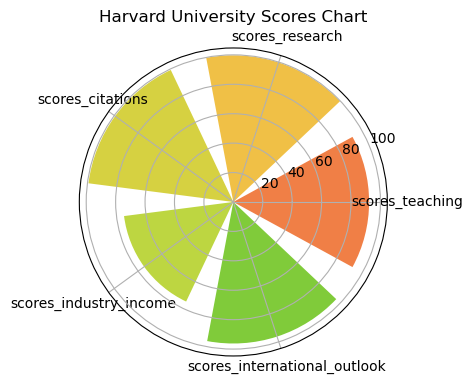

In [8]:
# Define the variables and their values for each category
categories = ['scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']
values = [92.3,99.7,99.3,74.9,96.2]
width = [1,1,1,1,1]
colors = ['#ed5f18','#edb118','#ccc612','#adcc12','#60bf08']

# Create an array of angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Create a figure and polar axes
plt.figure(figsize=(4,4))
plt.subplot(projection='polar')
plt.bar(angles, values, width=width, bottom=0.0, alpha=0.8, color=colors)
plt.thetagrids(angles * 180/np.pi, categories)
plt.title("Harvard University Scores Chart")
plt.show()

### 4. How many students TOP Universities have had over period of last 5 years

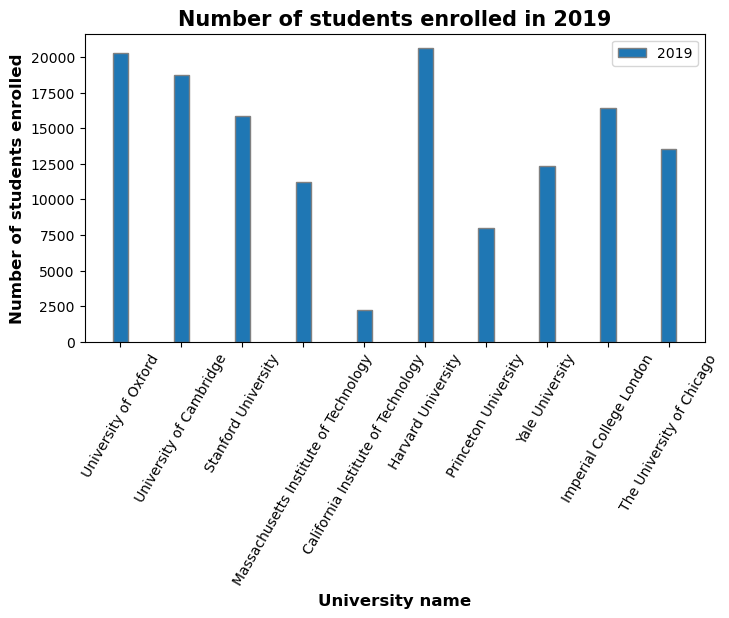

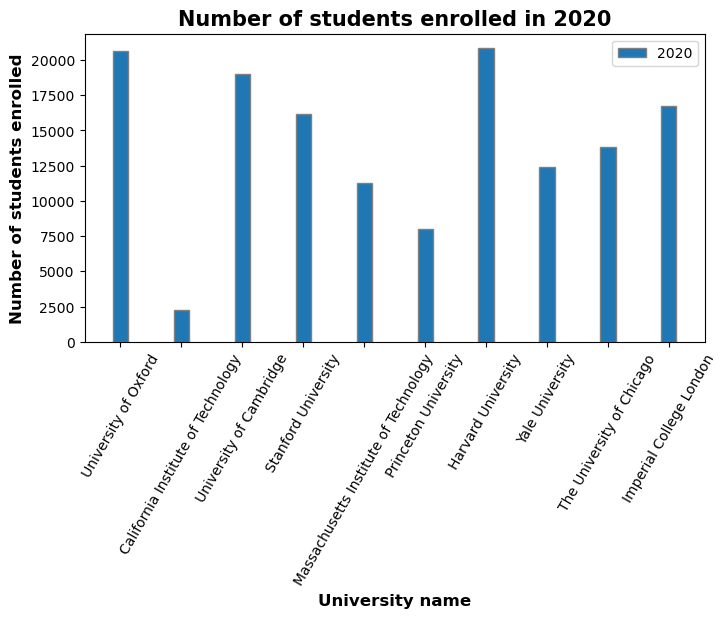

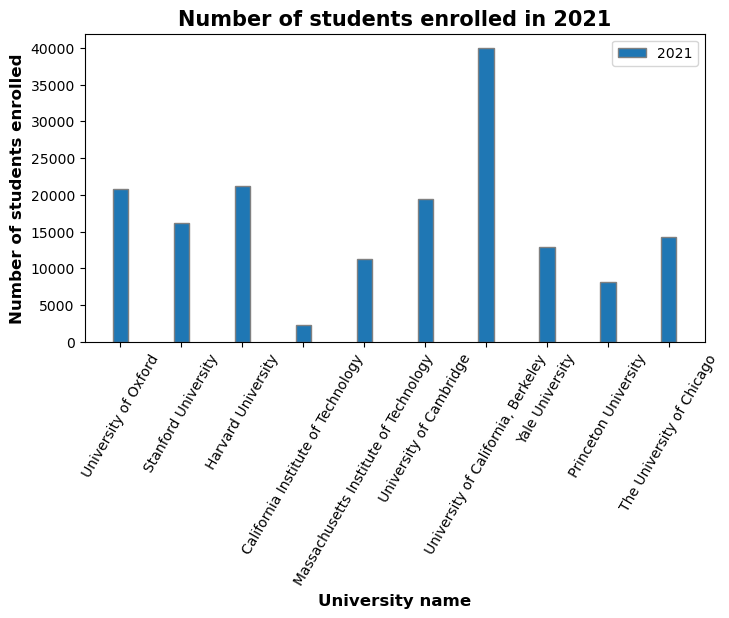

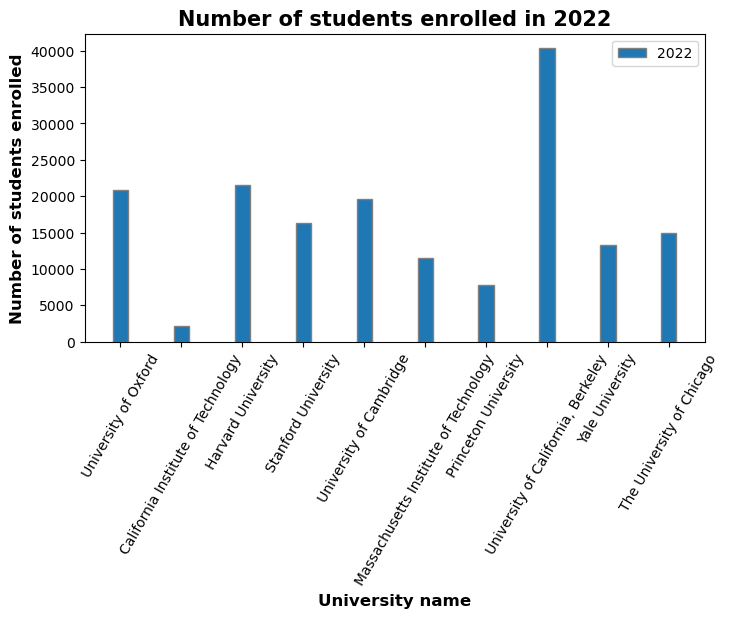

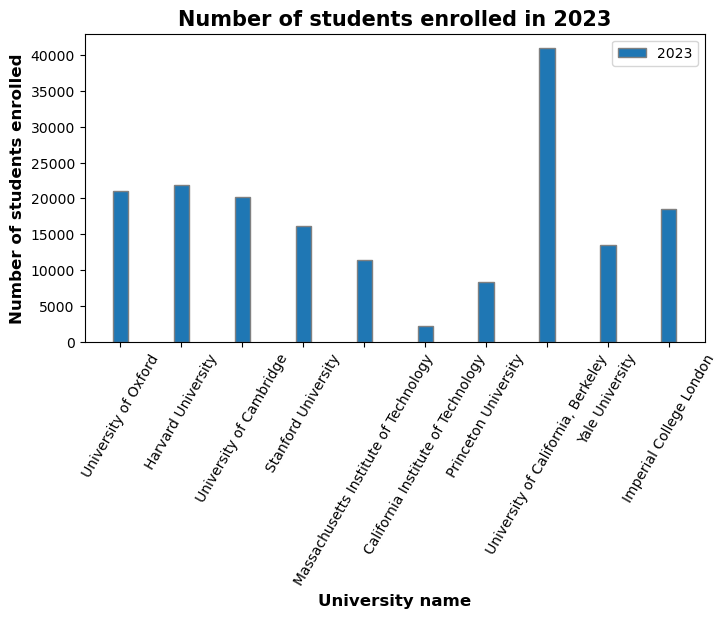

In [9]:
def students_count(df, year):
    studentdf = df[['name','stats_number_students']][:10]
    studentdf["year"] = year
    studentdf['stats_number_students'] = studentdf['stats_number_students'].str.replace(',','').astype("int64")
    return studentdf

student19 = students_count(df19, 2019)
student20 = students_count(df20, 2020)
student21 = students_count(df21, 2021)
student22 = students_count(df22, 2022)
student23 = students_count(df23, 2023)

# plot the figure
def students_plot(df, year):
    """ A function to plot the students count by top10 universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    matplotlib pyplot chart
    """
    plt.figure(figsize=(8,4))
    plt.bar(x=df['name'], height=df['stats_number_students'], width=0.25, edgecolor='grey', label=year)
    plt.xlabel('University name', fontweight ='bold', fontsize = 12)
    plt.ylabel('Number of students enrolled', fontweight ='bold', fontsize = 12)
    plt.xticks(rotation=60)
    plt.legend()
    plt.title(f"Number of students enrolled in {year}",fontweight ='bold', fontsize = 15)
    plt.show()
    
students_plot(student19, 2019)
students_plot(student20, 2020)
students_plot(student21, 2021)
students_plot(student22, 2022)
students_plot(student23, 2023)

### 5. Let's look at the relation between Teaching and Ranking of the university with number of students

In [10]:
def tr_relationsdf(df, year):
    trdf = df[['name','scores_teaching','scores_research','stats_number_students','stats_student_staff_ratio']][:20]
    trdf["year"] = year
    trdf['stats_number_students'] = trdf['stats_number_students'].str.replace(',','').astype("int64")
    return trdf

tr19 = tr_relationsdf(df19, 2019)
tr20 = tr_relationsdf(df20, 2020)
tr21 = tr_relationsdf(df21, 2021)
tr22 = tr_relationsdf(df22, 2022)
tr23 = tr_relationsdf(df23, 2023)

# plot the chart
fig = px.scatter(tr19, 
                 x="scores_research", 
                 y="scores_teaching", 
                 color="stats_student_staff_ratio",
                 size='stats_number_students', 
                 hover_data=['name'],
                 title='How teaching and research relate with Students and staff?')

fig.update_layout(xaxis_title='Research score',
                  yaxis_title='Teaching score',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22)
fig.show()